In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
def holdout_estimation(model,X,y,test_size=0.3,seed=0):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f'Estimated accuracy by holdout {accuracy_score(y_test,y_pred)}')

In [3]:
def plot_decisionBound(model,X,y):
    disp = DecisionBoundaryDisplay.from_estimator(
        model, X, response_method="predict",
        alpha=0.5)
    disp.ax_.scatter(X['X1'], X['X2'], c=y, edgecolor="k") 
    plt.show()

In [4]:


df1 = pd.read_csv("ds1.csv")
df2 = pd.read_csv("ds2.csv")
df3 = pd.read_csv("ds3.csv")

#2. Defining features and Target
X1 = df1.drop(['Class'], axis=1)
y1 = df1.Class

X2 = df2.drop(['Class'], axis=1)
y2 = df2.Class

X3 = df3.drop(['Class'], axis=1)
y3 = df3.Class

In [5]:
# Learning Alg.
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
lda = LinearDiscriminantAnalysis()
gnb = GaussianNB()

Estimated accuracy by holdout 1.0


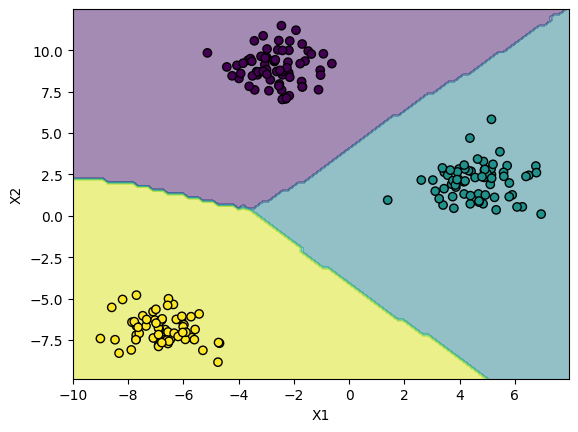

In [6]:
holdout_estimation(knn,X1,y1)
plot_decisionBound(knn,X1,y1)

Estimated accuracy by holdout 1.0


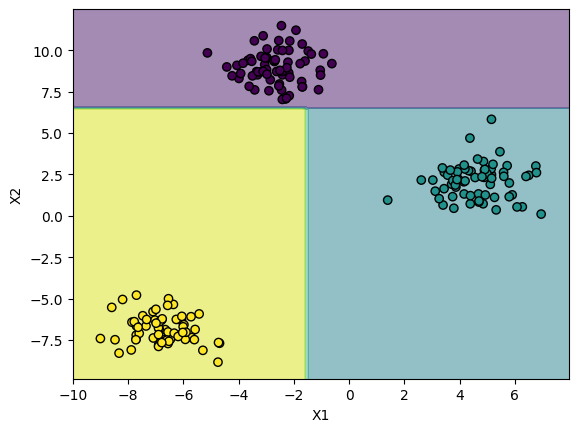

In [7]:
holdout_estimation(dt,X1,y1)
plot_decisionBound(dt,X1,y1)

Estimated accuracy by holdout 1.0


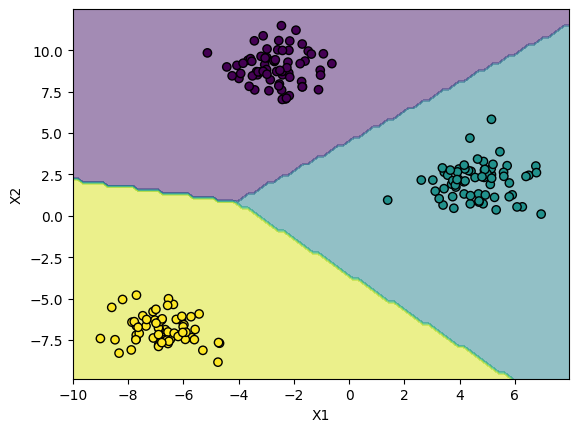

In [8]:
holdout_estimation(lda,X1,y1)
plot_decisionBound(lda,X1,y1)

Estimated accuracy by holdout 1.0


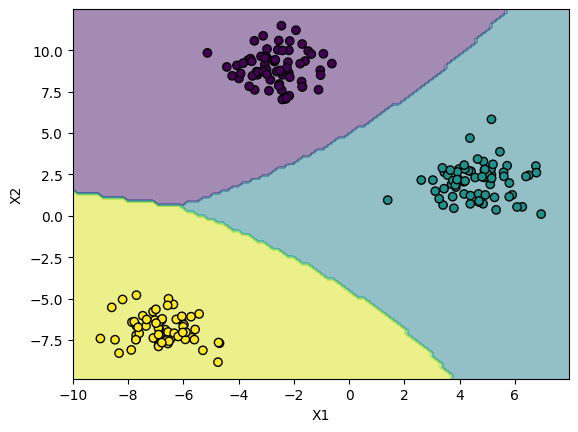

In [9]:
holdout_estimation(gnb,X1,y1)
plot_decisionBound(gnb,X1,y1)

Estimated accuracy by holdout 0.8666666666666667


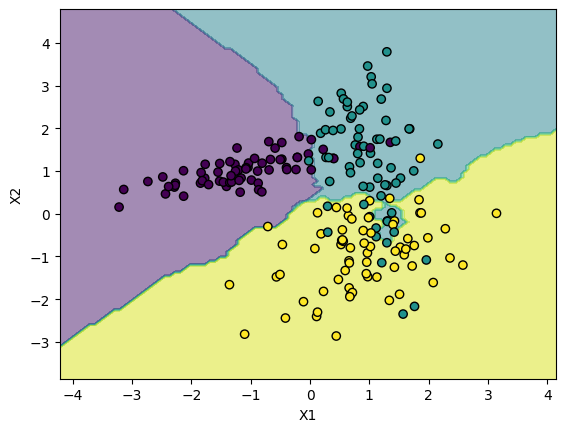

In [10]:
holdout_estimation(knn,X2,y2)
plot_decisionBound(knn,X2,y2)

Estimated accuracy by holdout 0.85


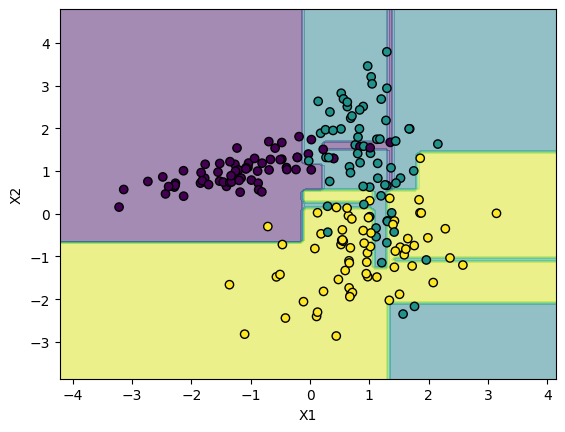

In [11]:
holdout_estimation(dt,X2,y2)
plot_decisionBound(dt,X2,y2)

Estimated accuracy by holdout 0.8


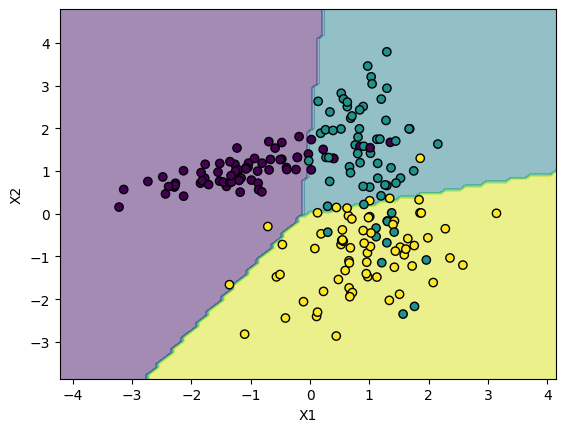

In [12]:
holdout_estimation(lda,X2,y2)
plot_decisionBound(lda,X2,y2)

Estimated accuracy by holdout 0.8666666666666667


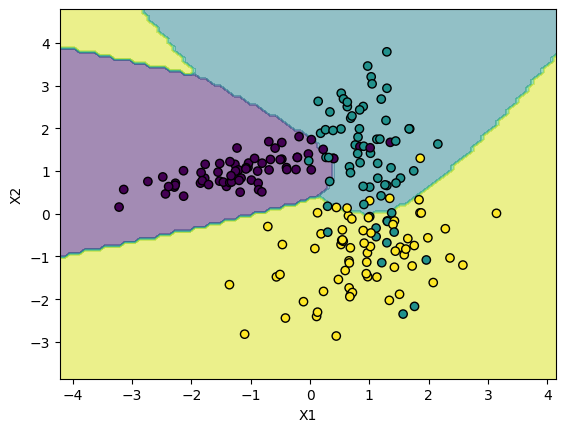

In [13]:
holdout_estimation(gnb,X2,y2)
plot_decisionBound(gnb,X2,y2)

Estimated accuracy by holdout 0.8833333333333333


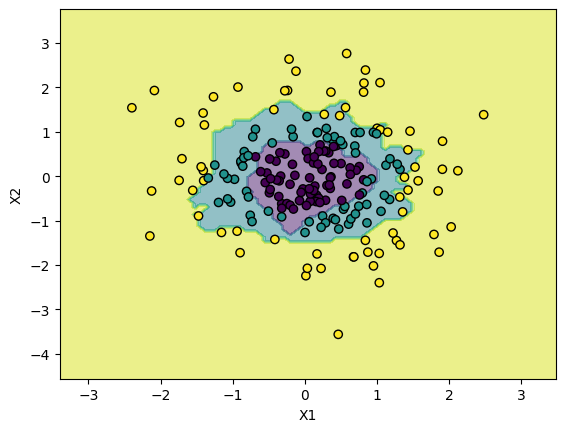

In [14]:
holdout_estimation(knn,X3,y3)
plot_decisionBound(knn,X3,y3)

Estimated accuracy by holdout 0.8666666666666667


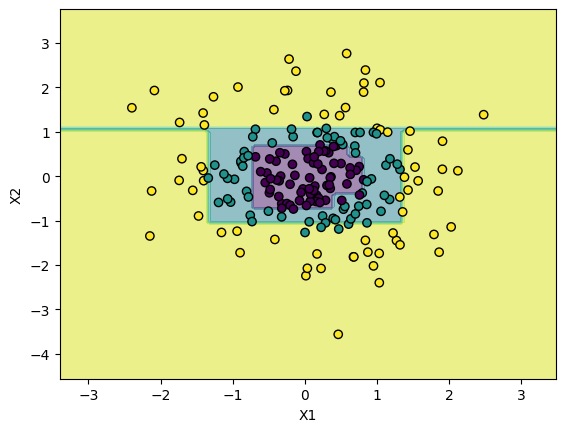

In [15]:
holdout_estimation(dt,X3,y3)
plot_decisionBound(dt,X3,y3)

Estimated accuracy by holdout 0.4166666666666667


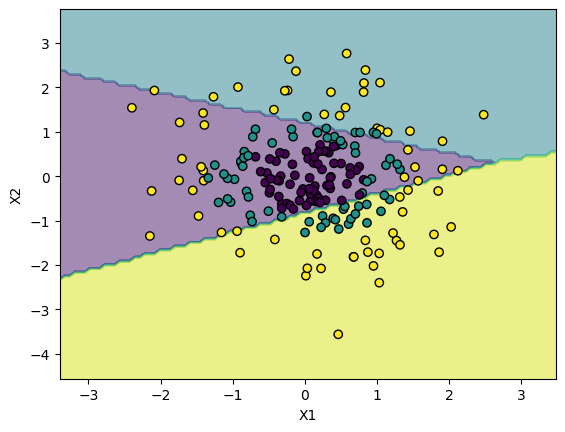

In [16]:
holdout_estimation(lda,X3,y3)
plot_decisionBound(lda,X3,y3)

Estimated accuracy by holdout 0.9166666666666666


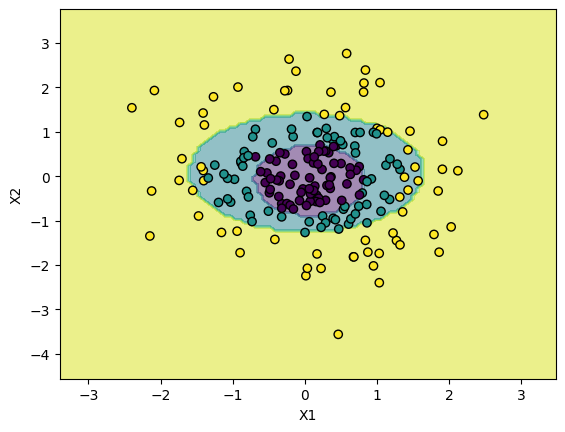

In [17]:
holdout_estimation(gnb,X3,y3)
plot_decisionBound(gnb,X3,y3)

In [18]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn100 = KNeighborsClassifier(n_neighbors=100)

Estimated accuracy by holdout 0.6166666666666667


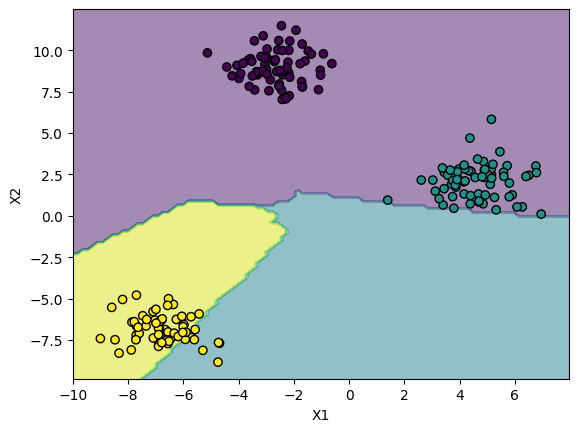

In [19]:
holdout_estimation(knn100,X1,y1)
plot_decisionBound(knn100,X1,y1)

Estimated accuracy by holdout 0.75


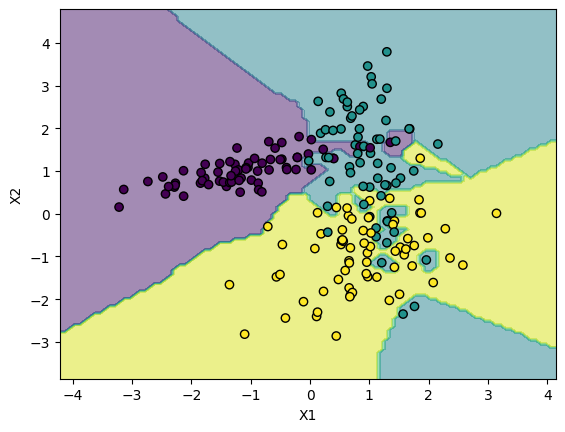

In [20]:
holdout_estimation(knn1,X2,y2)
plot_decisionBound(knn1,X2,y2)

In [21]:
#17.1 Cross Validation in knn
# kmax = 100
def find_k_knn(X,y,kmax=10):
    k_values = [i for i in range (1,kmax+1)]
    scores = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        score = cross_val_score(knn, X, y, cv=5)
        scores.append(np.mean(score))
    
    #Ploting the results of Cross Validation
    sns.lineplot(x = k_values, y = scores, marker = 'o')
    plt.xlabel("K Values")
    plt.ylabel("Accuracy Score of k-NN")
    plt.title('Estimates by Cross Validation')
    
    best_index = np.argmax(scores)
    best_k = k_values[best_index]
    print(f'Best k = {best_k}')
    return best_k

Best k = 1


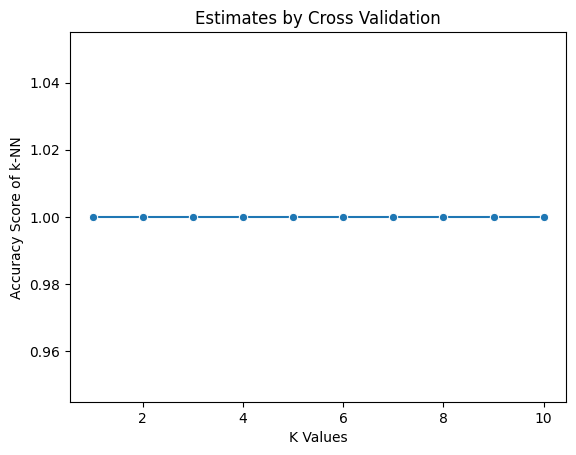

In [22]:
k1 = find_k_knn(X1,y1)

Best k = 6


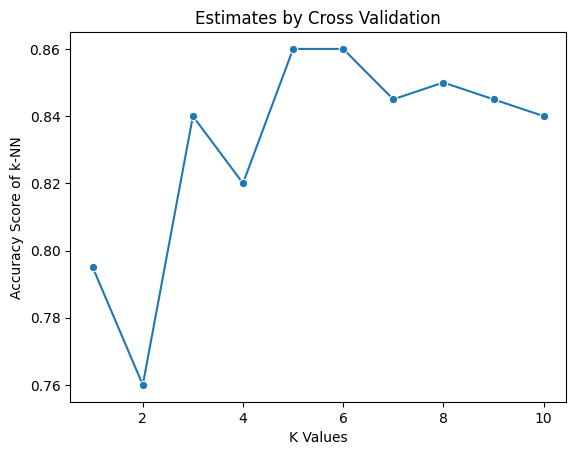

In [23]:
k2 = find_k_knn(X2,y2)

Best k = 1


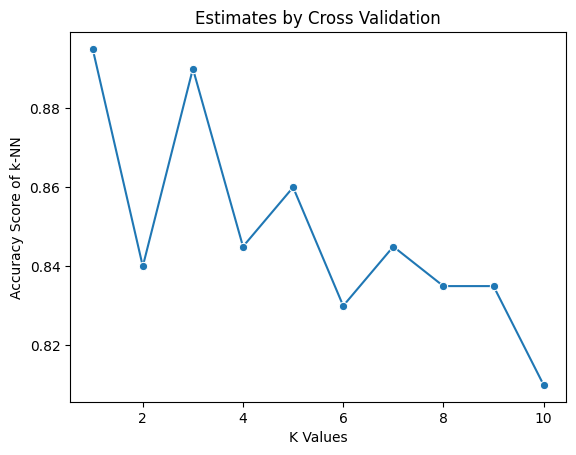

In [24]:
k3 = find_k_knn(X3,y3)